In [49]:
import pandas as pd

df1 = pd.read_csv('gdp_df.csv')

In [50]:
df1

,country,year,anxiety_rate,depressive_disorder_rate,gdp_per_capita
0,Afghanistan,2009,4.695,4.949,1519.693
1,Afghanistan,2010,4.702,4.947,1710.575
2,Afghanistan,2011,4.716,4.945,1699.488
3,Afghanistan,2012,4.739,4.945,1914.774
4,Afghanistan,2013,4.767,4.944,2015.515
...,...,...,...,...,...
1834,Zimbabwe,2015,3.184,3.408,2679.508
1835,Zimbabwe,2016,3.187,3.411,2806.469
1836,Zimbabwe,2017,3.188,3.412,3795.642
1837,Zimbabwe,2018,3.172,3.407,4017.222


In [51]:
# need to define gdp_per_capita:
gdp_per_capita = df1.pivot(index='country', columns='year', values='gdp_per_capita')

In [53]:
GDP_change = gdp_per_capita[2014] - gdp_per_capita[2009]

In [54]:
GDP_change

country
Afghanistan             549.731
Albania                2446.239
Algeria                 280.888
Angola                 1708.623
Antigua and Barbuda   -3396.389
                         ...   
Vanuatu                 111.306
Vietnam                1792.471
World                  2745.661
Zambia                  606.305
Zimbabwe               1079.634
Length: 169, dtype: float64

In [55]:
anxiety_rate = df1.pivot(index='country', columns='year', values='anxiety_rate')

In [75]:
anxiety_change = anxiety_rate[2014] - anxiety_rate[2009]

In [76]:
anxiety_change

country
Afghanistan            0.098
Albania                0.062
Algeria                0.053
Angola                -0.011
Antigua and Barbuda    0.042
                       ...  
Vanuatu                0.048
Vietnam                0.251
World                 -0.067
Zambia                 0.120
Zimbabwe              -0.005
Length: 169, dtype: float64

In [58]:
depressive_disorder_rate = df1.pivot(index='country', columns='year', values='depressive_disorder_rate')

In [59]:
depressive_disorder_change = depressive_disorder_rate[2014] - depressive_disorder_rate[2009]

In [60]:
depressive_disorder_change

country
Afghanistan           -0.004
Albania               -0.005
Algeria                0.019
Angola                -0.016
Antigua and Barbuda    0.045
                       ...  
Vanuatu               -0.019
Vietnam               -0.027
World                 -0.009
Zambia                 0.075
Zimbabwe               0.061
Length: 169, dtype: float64

In [77]:
# Merge into a new dataframe for analysis

gdp_change = gdp_per_capita[2014] - gdp_per_capita[2009]
anxiety_change = anxiety_rate[2014] - anxiety_rate[2009]
depressive_disorder_change = depressive_disorder_rate[2014] - depressive_disorder_rate[2009]

# Merge into one DataFrame
change_df = pd.DataFrame({
    'gdp_change': gdp_change,
    'anxiety_change': anxiety_change,
    'depressive_change': depressive_change  
}).dropna()

In [78]:
change_df

,gdp_change,anxiety_change,depressive_change
country,,,
Afghanistan,549.731,0.098,-0.004
Albania,2446.239,0.062,-0.005
Algeria,280.888,0.053,0.019
Angola,1708.623,-0.011,-0.016
Antigua and Barbuda,-3396.389,0.042,0.045
...,...,...,...
Vanuatu,111.306,0.048,-0.019
Vietnam,1792.471,0.251,-0.027
World,2745.661,-0.067,-0.009


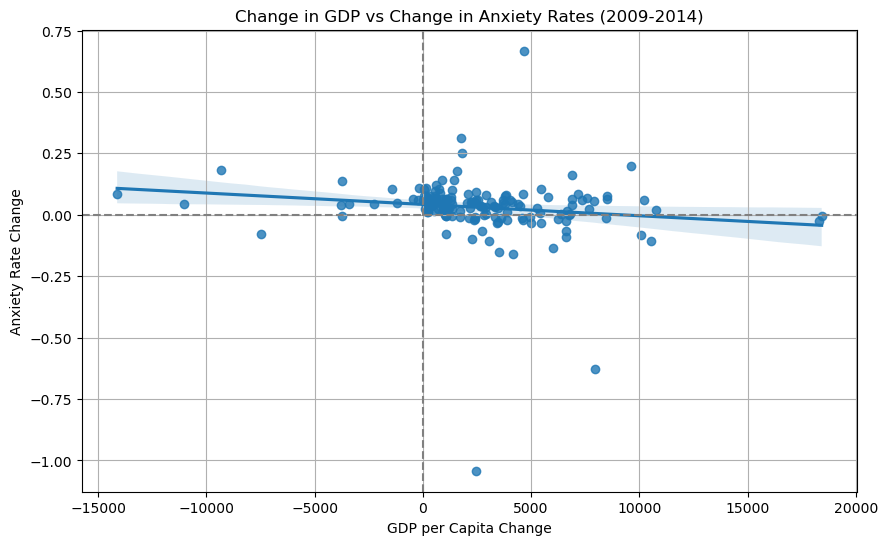

In [82]:
# Scatter Plot: GDP Change vs Anxiety Rate Change

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(data=change_df, x='gdp_change', y='anxiety_change')
plt.title('Change in GDP vs Change in Anxiety Rates (2009-2014)')
plt.xlabel('GDP per Capita Change')
plt.ylabel('Anxiety Rate Change')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()

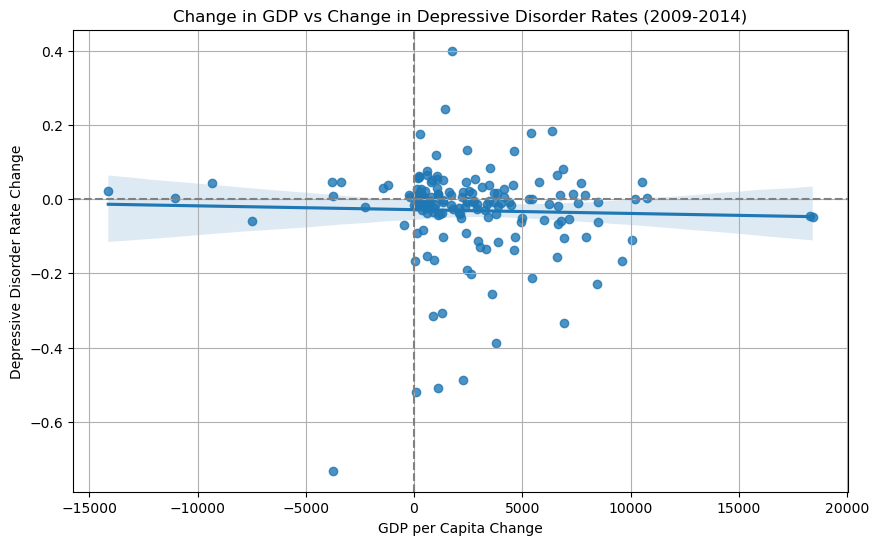

In [83]:
# Scatter Plot: 'GDP_change' and 'Depressive Disorder Rates_change'


plt.figure(figsize=(10, 6))
sns.regplot(data=change_df, x='gdp_change', y='depressive_change')
plt.title('Change in GDP vs Change in Depressive Disorder Rates (2009-2014)')
plt.xlabel('GDP per Capita Change')
plt.ylabel('Depressive Disorder Rate Change')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()

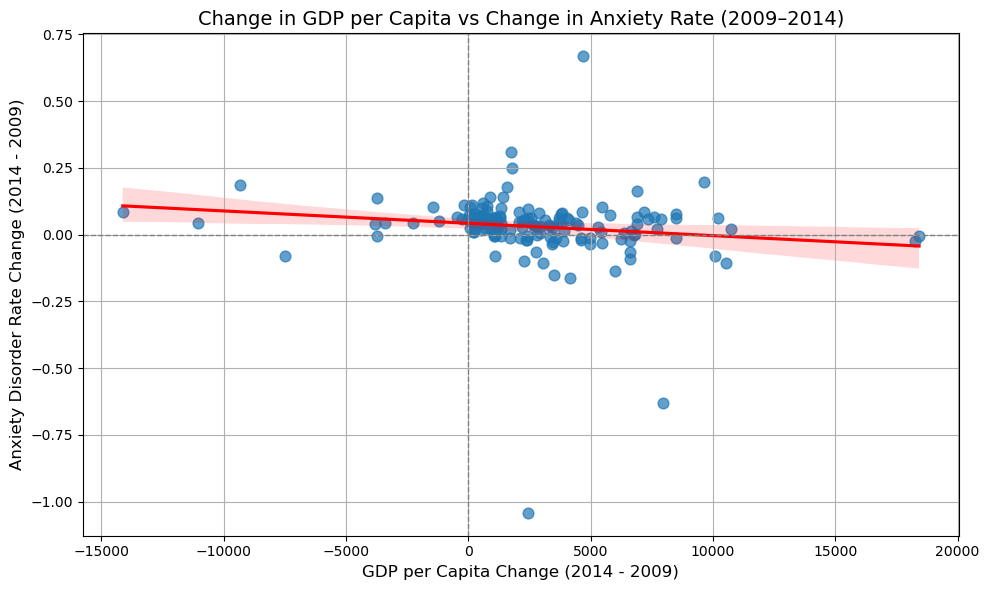

In [80]:
# Make sure change_df exists and contains the two columns:
# 'GDP_change' and 'Anxiety_change'

plt.figure(figsize=(10, 6))

# Create scatter plot with regression line
sns.regplot(
    data=change_df,
    x='gdp_change',
    y='anxiety_change',
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red'}
)

# Add titles and labels
plt.title('Change in GDP per Capita vs Change in Anxiety Rate (2009–2014)', fontsize=14)
plt.xlabel('GDP per Capita Change (2014 - 2009)', fontsize=12)
plt.ylabel('Anxiety Disorder Rate Change (2014 - 2009)', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.show()

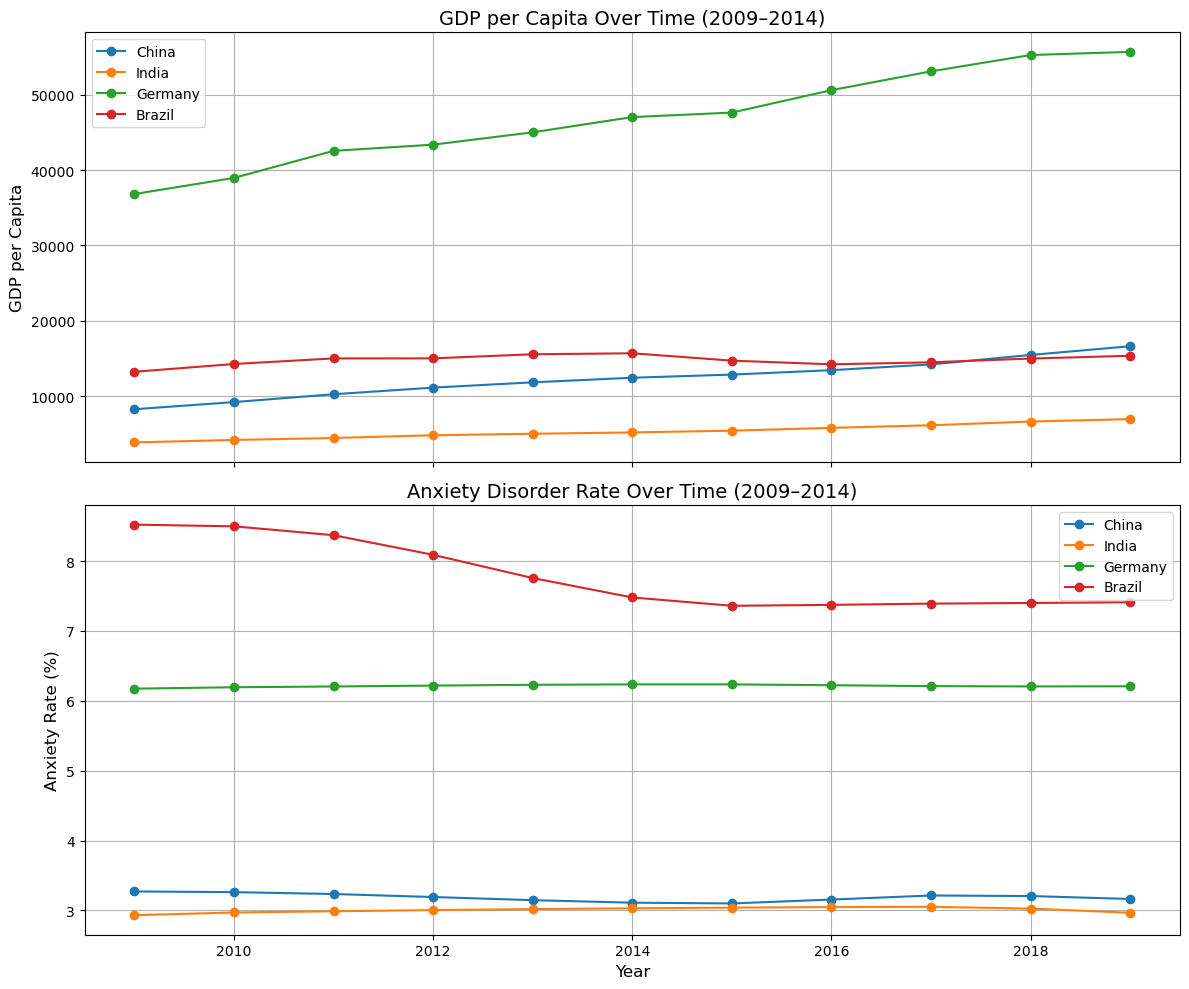

In [92]:
# Plot GDP and Anxiety Rate Over Time for Selected Countries

import matplotlib.pyplot as plt

# Choose countries to plot
selected_countries = ['China', 'India', 'Germany', 'Brazil']  # Change as needed

# Set up the figure with 2 subplots (one for GDP, one for Anxiety)
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot GDP per capita over time
for country in selected_countries:
    country_data = df1[df1['country'] == country]
    axs[0].plot(country_data['year'], country_data['gdp_per_capita'], label=country, marker='o')

axs[0].set_title('GDP per Capita Over Time (2009–2014)', fontsize=14)
axs[0].set_ylabel('GDP per Capita', fontsize=12)
axs[0].legend()
axs[0].grid(True)

# Plot Anxiety rate over time
for country in selected_countries:
    country_data = df1[df1['country'] == country]
    axs[1].plot(country_data['year'], country_data['anxiety_rate'], label=country, marker='o')

axs[1].set_title('Anxiety Disorder Rate Over Time (2009–2014)', fontsize=14)
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('Anxiety Rate (%)', fontsize=12)
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

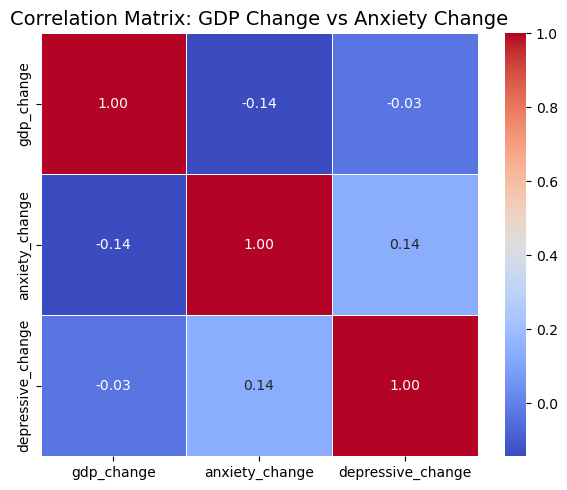

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = change_df.corr()

# Create a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix: GDP Change vs Anxiety Change", fontsize=14)
plt.tight_layout()
plt.show()

In [95]:
# A square grid showing how strongly each variable is related to the others.
# Correlation values range from -1 to 1:
# +1 = perfect positive correlation
# -1 = perfect negative correlation
# 0 = no correlation
# Example: If GDP change is negatively correlated with anxiety change (e.g. -0.6), 
# then increases in GDP are associated with decreases in anxiety.

print("Correlation between GDP change and anxiety change:")
print(change_df[['gdp_change', 'anxiety_change']].corr())

Correlation between GDP change and anxiety change:
                gdp_change  anxiety_change
gdp_change        1.000000       -0.143014
anxiety_change   -0.143014        1.000000


In [104]:
# Set seaborn style
sns.set(style="whitegrid")

# Sort top and bottom 10 countries by GDP change
top_gdp = change_df.sort_values('gdp_change', ascending=False).head(10)
bottom_gdp = change_df.sort_values('gdp_change', ascending=True).head(10)

# Sort top and bottom 10 countries by Anxiety change
top_anxiety = change_df.sort_values('anxiety_change', ascending=False).head(10)
bottom_anxiety = change_df.sort_values('anxiety_change', ascending=True).head(10)

In [105]:
top_gdp

,gdp_change,anxiety_change,depressive_change
country,,,
Luxembourg,18420.431,-0.006,-0.049
Singapore,18274.186,-0.025,-0.045
Switzerland,10749.005,0.020,0.003
Norway,10528.470,-0.105,0.046
Germany,10195.707,0.061,0.000
Lithuania,10067.742,-0.082,-0.110
Ireland,9627.187,0.197,-0.167
Panama,8492.292,0.076,-0.007
Turkey,8492.239,0.063,-0.061


In [103]:
bottom_gdp

,gdp_change,anxiety_change,depressive_change
country,,,
Libya,-14127.071,0.086,0.023
San Marino,-11059.085,0.044,0.002
Kuwait,-9341.918,0.184,0.043
Oman,-7477.623,-0.079,-0.060
Cyprus,-3804.650,0.040,0.045
Equatorial Guinea,-3751.707,-0.006,0.009
Greece,-3734.087,0.137,-0.732
Antigua and Barbuda,-3396.389,0.042,0.045
Bermuda,-2264.727,0.044,-0.022


In [106]:
top_anxiety

,gdp_change,anxiety_change,depressive_change
country,,,
Netherlands,4676.294,0.668,-0.102
Iraq,1760.450,0.311,0.400
Vietnam,1792.471,0.251,-0.027
Ireland,9627.187,0.197,-0.167
Kuwait,-9341.918,0.184,0.043
Italy,1591.977,0.177,0.020
Canada,6888.338,0.163,0.081
Nepal,891.464,0.141,-0.316
Spain,1433.376,0.140,0.244


In [107]:
bottom_anxiety

,gdp_change,anxiety_change,depressive_change
country,,,
Brazil,2449.443,-1.042,-0.190
United States,7950.008,-0.629,-0.102
China,4172.489,-0.161,0.006
Mexico,3509.145,-0.150,0.085
Japan,6008.129,-0.136,-0.057
Colombia,3048.454,-0.108,-0.128
Norway,10528.470,-0.105,0.046
Portugal,2283.529,-0.098,-0.488
Chile,6627.036,-0.090,-0.018


/var/folders/bv/pz5wwd1x5nb7wmxlylb_sd4c0000gq/T/ipykernel_2682/196209218.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_gdp['gdp_change'], y=top_gdp.index, ax=axs[0], palette='Greens_r')
/var/folders/bv/pz5wwd1x5nb7wmxlylb_sd4c0000gq/T/ipykernel_2682/196209218.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_gdp['gdp_change'], y=bottom_gdp.index, ax=axs[1], palette='Reds')


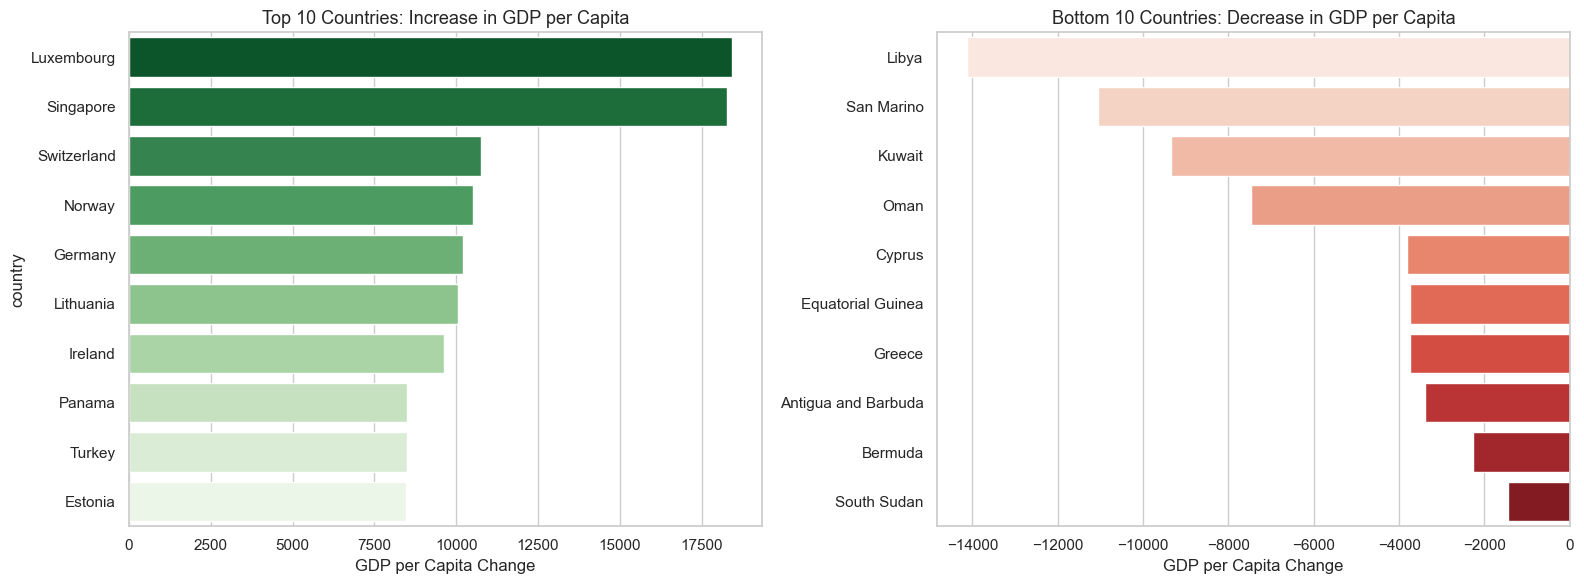

In [99]:
# Bar Plot: GDP Change (Top & Bottom 10)
# Plot GDP Change
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=top_gdp['gdp_change'], y=top_gdp.index, ax=axs[0], palette='Greens_r')
axs[0].set_title('Top 10 Countries: Increase in GDP per Capita', fontsize=13)
axs[0].set_xlabel('GDP per Capita Change')
axs[0].set_ylabel('country')

sns.barplot(x=bottom_gdp['gdp_change'], y=bottom_gdp.index, ax=axs[1], palette='Reds')
axs[1].set_title('Bottom 10 Countries: Decrease in GDP per Capita', fontsize=13)
axs[1].set_xlabel('GDP per Capita Change')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()

/var/folders/bv/pz5wwd1x5nb7wmxlylb_sd4c0000gq/T/ipykernel_2682/1951470572.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_anxiety['anxiety_change'], y=top_anxiety.index, ax=axs[0], palette='Oranges_r')
/var/folders/bv/pz5wwd1x5nb7wmxlylb_sd4c0000gq/T/ipykernel_2682/1951470572.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_anxiety['anxiety_change'], y=bottom_anxiety.index, ax=axs[1], palette='Blues')


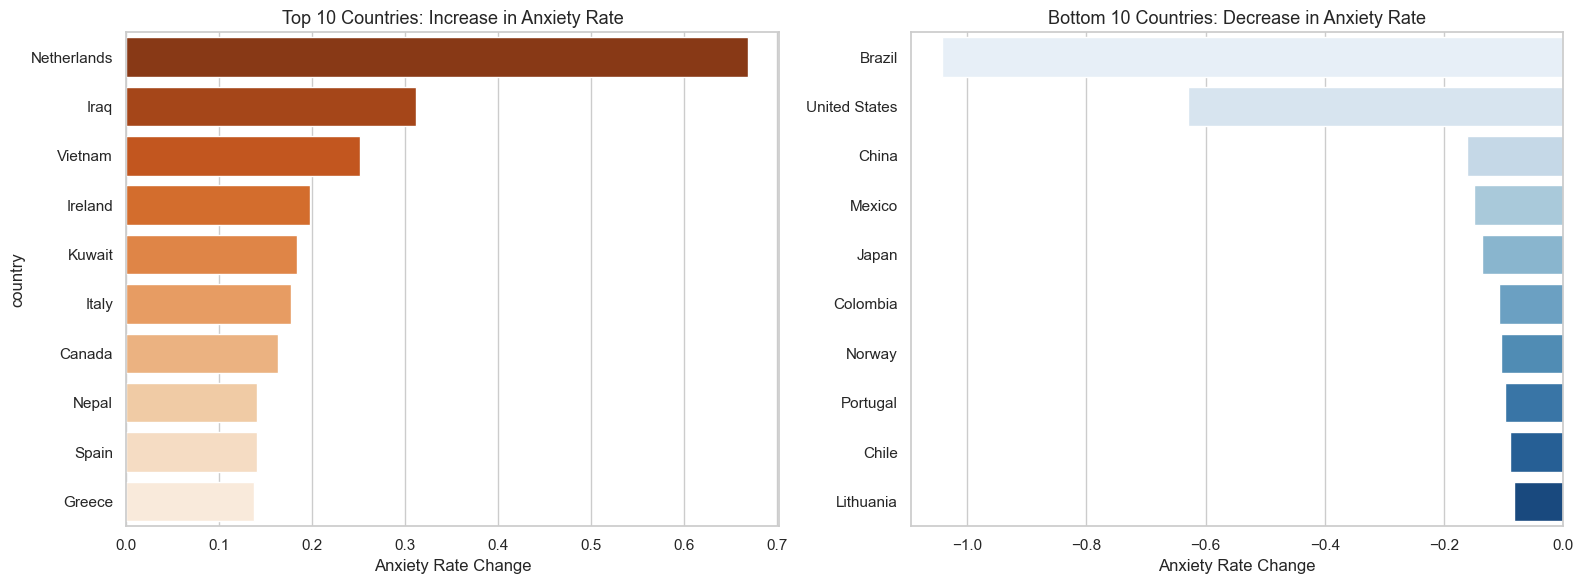

In [109]:
# Bar Plot: Anxiety Rate Change (Top & Bottom 10)
# Plot Anxiety Change
# This helps to visually identify which countries had the biggest improvements or declines in GDP and anxiety.

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=top_anxiety['anxiety_change'], y=top_anxiety.index, ax=axs[0], palette='Oranges_r')
axs[0].set_title('Top 10 Countries: Increase in Anxiety Rate', fontsize=13)
axs[0].set_xlabel('Anxiety Rate Change')
axs[0].set_ylabel('country')

sns.barplot(x=bottom_anxiety['anxiety_change'], y=bottom_anxiety.index, ax=axs[1], palette='Blues')
axs[1].set_title('Bottom 10 Countries: Decrease in Anxiety Rate', fontsize=13)
axs[1].set_xlabel('Anxiety Rate Change')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()